In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import soepy

# import get_moments

Analysis 30,000 obs
---------------------------

Parameters
--------------

In [2]:
# Note: fval at evaluation 764: 0.4233

params_vec_final_seed_30000 = [
    1.92653,
    1.99033,
    1.97371,
    0.12184,
    0.15709,
    0.27248,
    0.19276,
    0.17097,
    0.1275,
    0.07789,
    0.05422,
    0.07057,
    1.90072,
    2.44201,
    -0.19337,
    -0.49972,
    -0.10013,
    -0.30067,
    0.20123,
    0.30097,
    0.01001,
    0.19132,
    0.46936,
]

In [3]:
# Note fval at evaluation 999 = 2.31187

params_vec_final_delta0_30000 = [
    1.96669,
    1.99444,
    1.96564,
    0.12935,
    0.1534,
    0.27654,
    0.18697,
    0.09953,
    0.1336,
    0.08138,
    0.05418,
    0.07012,
    1.89964,
    2.43725,
    -0.19796,
    -0.49496,
    -0.09977,
    -0.30698,
    0.19579,
    0.29856,
    0.00946,
    0.04842,
    0.47511,
]

In [4]:
# Note: fval at evaluation 623 = 2.62556
# fval at evaluation 1 = 2.63913

params_vec_final_delta0_start_30000 = [
    1.96161,
    1.9975,
    1.96885,
    0.12917,
    0.15395,
    0.27591,
    0.18774,
    0.10086,
    0.13353,
    0.08118,
    0.05396,
    0.06963,
    1.89973,
    2.43691,
    -0.19811,
    -0.49489,
    -0.09975,
    -0.30904,
    0.19514,
    0.29531,
    0.0096,
    0.04763,
    0.47464,
]

In [5]:
model_params_true = pd.read_pickle("init_files/toy_model_init_file_03_3types.pkl")

In [6]:
model_params_true["value"] - params_vec_final_seed_30000

category       name     
const_wage_eq  gamma_0s1   -0.00153
               gamma_0s2    0.00067
               gamma_0s3    0.00029
exp_returns    gamma_1s1    0.00016
               gamma_1s2   -0.00009
               gamma_1s3    0.00052
exp_accm       g_s1        -0.01176
               g_s2        -0.07697
               g_s3         0.00050
exp_deprec     delta_s1     0.00011
               delta_s2    -0.00022
               delta_s3    -0.00057
disutil_work   const_p     -0.00072
               const_f     -0.00101
hetrg_unobs    theta_p1    -0.00663
               theta_f1    -0.00028
               theta_p2     0.00013
               theta_f2     0.00067
shares         share_1     -0.00123
               share_2     -0.00097
sd_wage_shock  sigma_1     -0.00001
               sigma_2      0.00068
               sigma_3      0.00064
Name: value, dtype: float64

In [7]:
model_params_true["value"] - params_vec_final_delta0_30000

category       name     
const_wage_eq  gamma_0s1   -0.04169
               gamma_0s2   -0.00344
               gamma_0s3    0.00836
exp_returns    gamma_1s1   -0.00735
               gamma_1s2    0.00360
               gamma_1s3   -0.00354
exp_accm       g_s1        -0.00597
               g_s2        -0.00553
               g_s3        -0.00560
exp_deprec     delta_s1    -0.00338
               delta_s2    -0.00018
               delta_s3    -0.00012
disutil_work   const_p      0.00036
               const_f      0.00375
hetrg_unobs    theta_p1    -0.00204
               theta_f1    -0.00504
               theta_p2    -0.00023
               theta_f2     0.00698
shares         share_1      0.00421
               share_2      0.00144
sd_wage_shock  sigma_1      0.00054
               sigma_2      0.14358
               sigma_3     -0.00511
Name: value, dtype: float64

In [8]:
model_params_true["value"] - params_vec_final_delta0_start_30000

category       name     
const_wage_eq  gamma_0s1   -0.03661
               gamma_0s2   -0.00650
               gamma_0s3    0.00515
exp_returns    gamma_1s1   -0.00717
               gamma_1s2    0.00305
               gamma_1s3   -0.00291
exp_accm       g_s1        -0.00674
               g_s2        -0.00686
               g_s3        -0.00553
exp_deprec     delta_s1    -0.00318
               delta_s2     0.00004
               delta_s3     0.00037
disutil_work   const_p      0.00027
               const_f      0.00409
hetrg_unobs    theta_p1    -0.00189
               theta_f1    -0.00511
               theta_p2    -0.00025
               theta_f2     0.00904
shares         share_1      0.00486
               share_2      0.00469
sd_wage_shock  sigma_1      0.00040
               sigma_2      0.14437
               sigma_3     -0.00464
Name: value, dtype: float64

In [9]:
model_params_seed = model_params_true
model_params_seed["value"] = params_vec_final_seed_30000

In [10]:
model_params_delta0 = model_params_true
model_params_delta0["value"] = params_vec_final_delta0_30000

In [11]:
model_params_delta0_start = model_params_true
model_params_delta0_start["value"] = params_vec_final_delta0_start_30000

In [12]:
data_obs = pd.read_pickle("init_files/data_obs_3types_9000.pkl")

In [13]:
data_sim_seed = soepy.simulate(model_params_seed, "init_files/model_spec_init_test_seed_30000.yml")

In [14]:
data_sim_delta0 = soepy.simulate(model_params_delta0, "init_files/model_spec_init_test_delta0_30000.yml")

In [15]:
data_sim_delta0_start = soepy.simulate(model_params_delta0_start, "init_files/model_spec_init_test_zero_30000.yml")

Get moments

In [16]:
def get_moments(data):
    # Pre_process data frame

    # Determine the education level given years of experience
    data["Educ_Level"] = 0
    data.loc[data["Years_of_Education"] == 11, "Educ_Level"] = 1
    data.loc[data["Years_of_Education"] == 12, "Educ_Level"] = 2

    # Determine the observed wage given period choice
    data["Wage_Observed"] = 0
    data.loc[data["Choice"] == 0, "Wage_Observed"] = data.loc[
        data["Choice"] == 0, "Period_Wage_N"
    ]
    data.loc[data["Choice"] == 1, "Wage_Observed"] = data.loc[
        data["Choice"] == 1, "Period_Wage_P"
    ]
    data.loc[data["Choice"] == 2, "Wage_Observed"] = data.loc[
        data["Choice"] == 2, "Period_Wage_F"
    ]

    # Calculate moments

    # Initialize moments dictionary
    moments = dict()

    # Store moments in groups as nested dictionary
    for group in ["Wage_Distribution", "Choice_Probability"]:
        moments[group] = dict()

    # Compute unconditional moments of the wage distribution
    info = data.groupby(["Period"])["Wage_Observed"].describe().to_dict()

    # Save mean and standard deviation of wages for each period
    # to Wage Distribution section of the moments dictionary
    for period in range(30):  ## TO DO: Remove hard coded number
        moments["Wage_Distribution"][period] = []
        try:
            for label in ["mean", "std"]:
                moments["Wage_Distribution"][period].append(info[label][period])
        except KeyError:
            for i in range(2):
                moments["Wage_Distribution"][period].append(0.0)

    # Compute unconditional moments of the choice probabilities
    info = data.groupby(["Period"])["Choice"].value_counts(normalize=True).to_dict()

    for period in range(30):  ## TO DO: Remove hard coded number
        moments["Choice_Probability"][period] = []
        for choice in range(3):
            try:
                stat = info[(period, choice)]
            except KeyError:
                stat = 0.00
            moments["Choice_Probability"][period].append(stat)

    return moments

In [17]:
obs_moments = get_moments(data_obs)
seed_sim_moments = get_moments(data_sim_seed)
delta0_sim_moments = get_moments(data_sim_delta0)
delta0_start_sim_moments = get_moments(data_sim_delta0_start)

Comparison: Observed vs. seed test final values
---------------------------------------------------------

Choice Probabilities

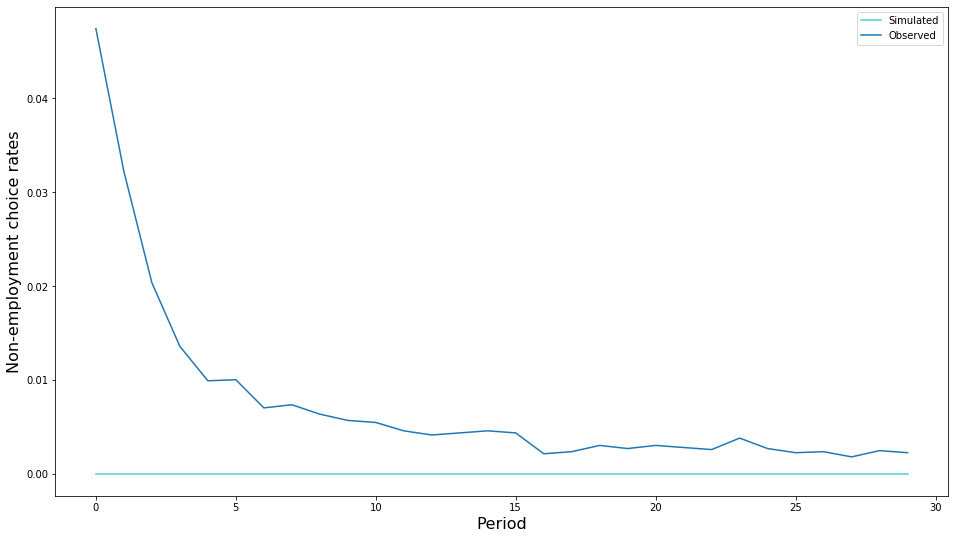

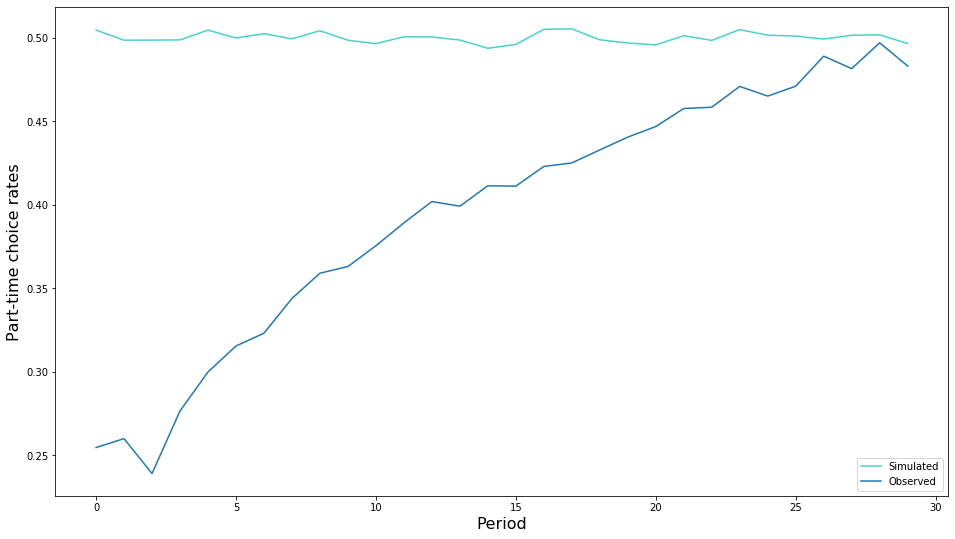

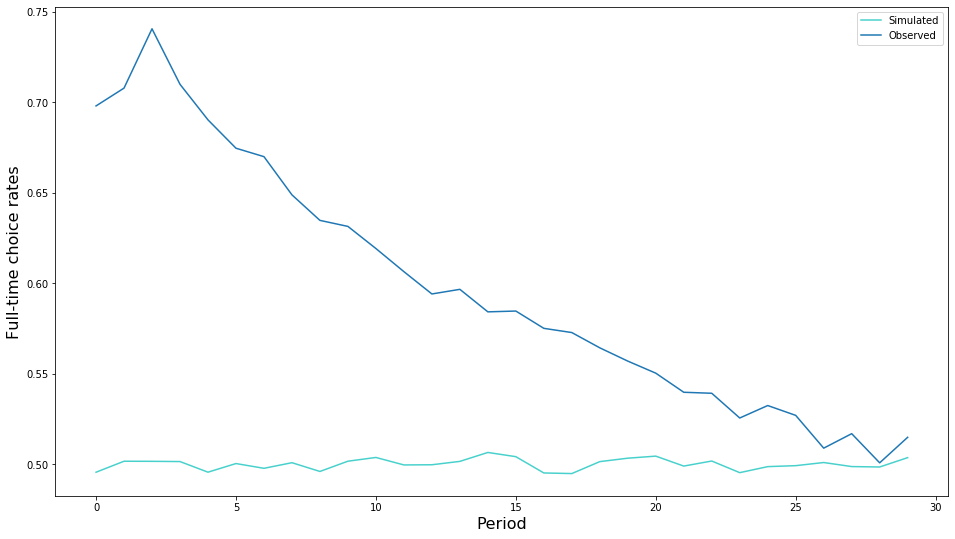

In [18]:
lables = ["Non-employment choice rates", "Part-time choice rates", "Full-time choice rates"]
for choice in range(3):

    obs_choice_prob = []
    for _, value in obs_moments["Choice_Probability"].items():
        temp = [_, value]
        obs_choice_prob.append(temp[1][choice])

    sim_choice_prob = []
    for _, value in seed_sim_moments["Choice_Probability"].items():
        temp = [_, value]
        sim_choice_prob.append(temp[1][choice])
        
    x = np.arange(30)

    # Start plot
    ax = plt.figure(figsize=[16,9]).add_subplot(111)
    ax.set_ylabel(lables[choice], fontsize=16)
    ax.set_xlabel("Period", fontsize=16)

    plt.plot(x, sim_choice_prob, color = 'mediumturquoise')
    plt.plot(x, obs_choice_prob)

    ax.legend(["Simulated", "Observed"])

    #plt.savefig('choice_prob_cf.png', bbox_inches='tight')

Wages

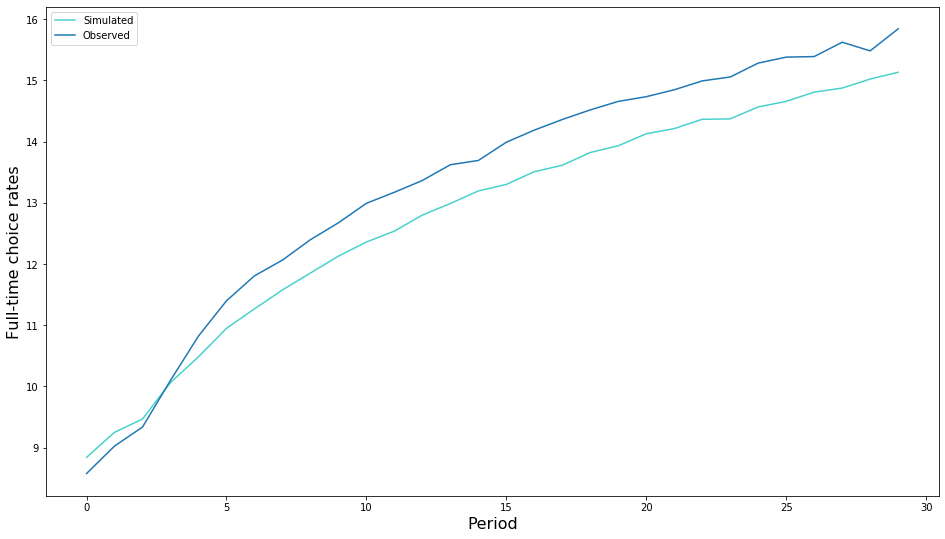

In [19]:
obs_wages = []
for _, value in obs_moments["Wage_Distribution"].items():
    temp = [_, value]
    obs_wages.append(temp[1][0])

sim_wages = []
for _, value in seed_sim_moments["Wage_Distribution"].items():
    temp = [_, value]
    sim_wages.append(temp[1][0])

x = np.arange(30)

# Start plot
ax = plt.figure(figsize=[16,9]).add_subplot(111)
ax.set_ylabel(lables[choice], fontsize=16)
ax.set_xlabel("Period", fontsize=16)

plt.plot(x, sim_wages, color = 'mediumturquoise')
plt.plot(x, obs_wages)

ax.legend(["Simulated", "Observed"])

#plt.savefig('choice_prob_cf.png', bbox_inches='tight')

Comparison: Observed vs. delta0 test final values
---------------------------------------------------------

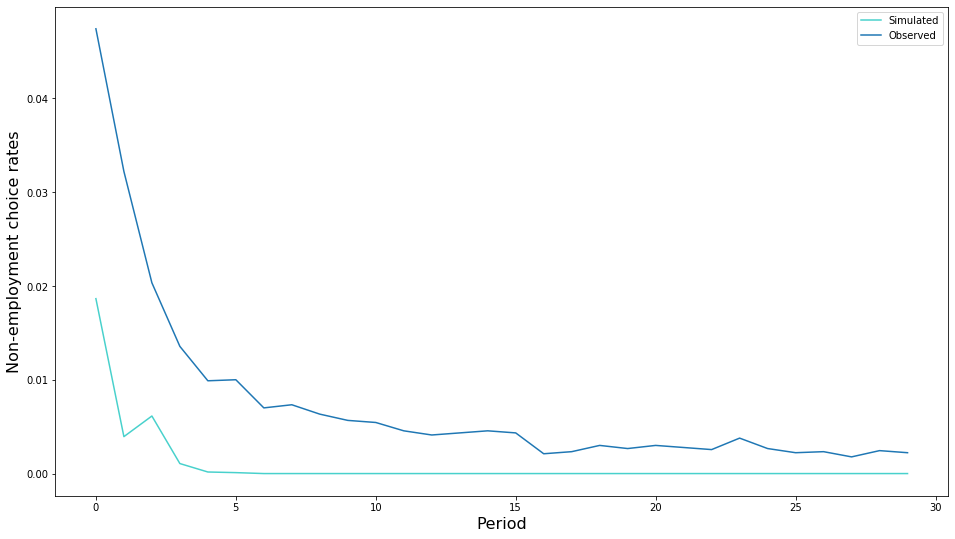

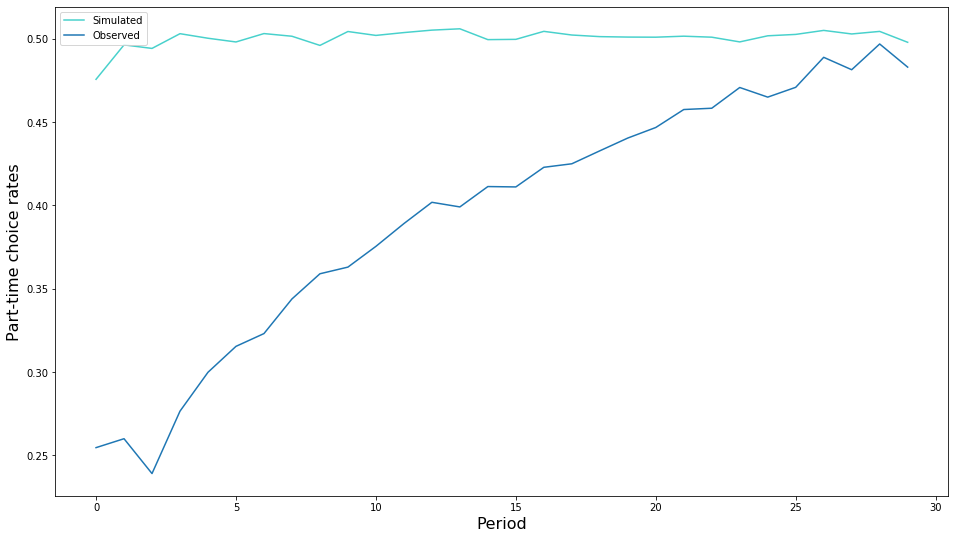

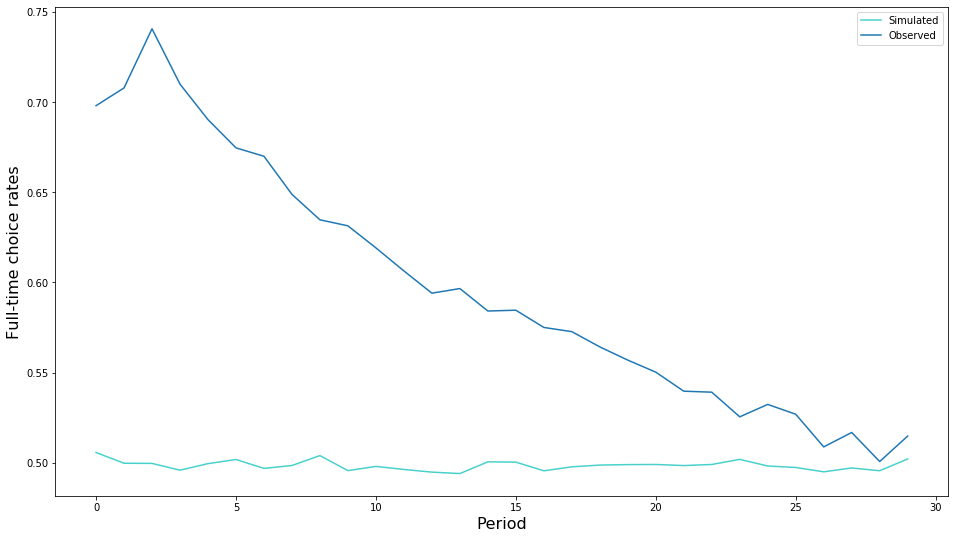

In [20]:
for choice in range(3):

    obs_choice_prob = []
    for _, value in obs_moments["Choice_Probability"].items():
        temp = [_, value]
        obs_choice_prob.append(temp[1][choice])

    sim_choice_prob = []
    for _, value in delta0_sim_moments["Choice_Probability"].items():
        temp = [_, value]
        sim_choice_prob.append(temp[1][choice])
        
    x = np.arange(30)

    # Start plot
    ax = plt.figure(figsize=[16,9]).add_subplot(111)
    ax.set_ylabel(lables[choice], fontsize=16)
    ax.set_xlabel("Period", fontsize=16)

    plt.plot(x, sim_choice_prob, color = 'mediumturquoise')
    plt.plot(x, obs_choice_prob)

    ax.legend(["Simulated", "Observed"])

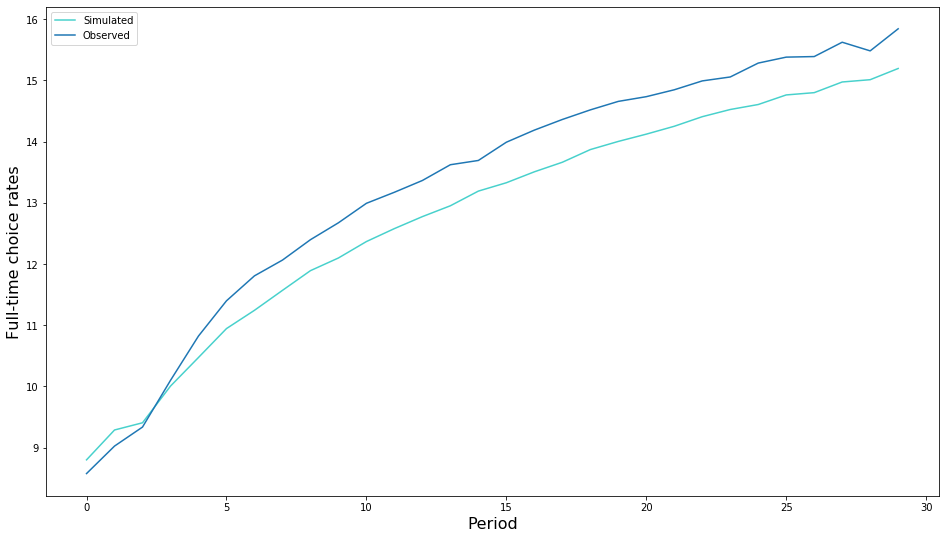

In [21]:
obs_wages = []
for _, value in obs_moments["Wage_Distribution"].items():
    temp = [_, value]
    obs_wages.append(temp[1][0])

sim_wages = []
for _, value in delta0_sim_moments["Wage_Distribution"].items():
    temp = [_, value]
    sim_wages.append(temp[1][0])

x = np.arange(30)

# Start plot
ax = plt.figure(figsize=[16,9]).add_subplot(111)
ax.set_ylabel(lables[choice], fontsize=16)
ax.set_xlabel("Period", fontsize=16)

plt.plot(x, sim_wages, color = 'mediumturquoise')
plt.plot(x, obs_wages)

ax.legend(["Simulated", "Observed"])

#plt.savefig('choice_prob_cf.png', bbox_inches='tight')

Comparison observed vs. delta0_start test final values
----------------------------------------------------------------

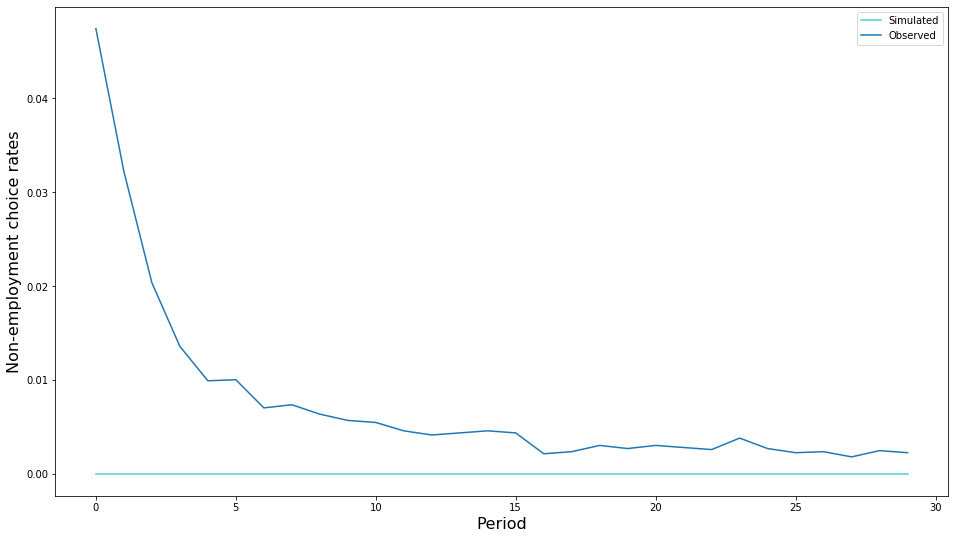

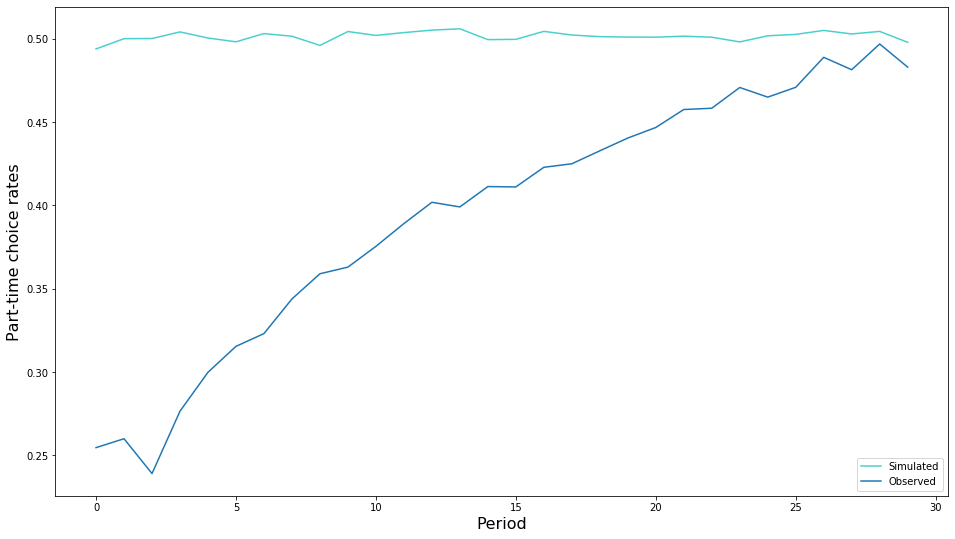

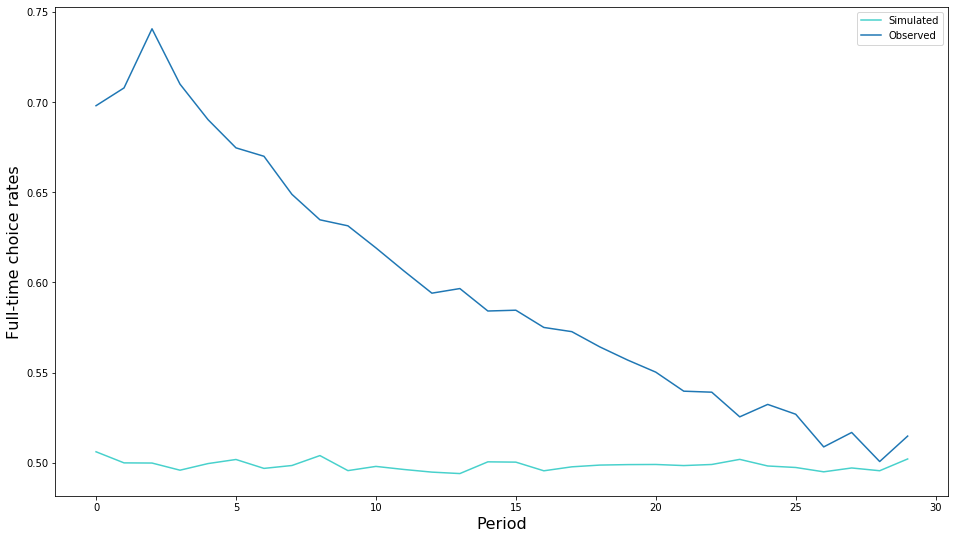

In [22]:
for choice in range(3):

    obs_choice_prob = []
    for _, value in obs_moments["Choice_Probability"].items():
        temp = [_, value]
        obs_choice_prob.append(temp[1][choice])

    sim_choice_prob = []
    for _, value in delta0_start_sim_moments["Choice_Probability"].items():
        temp = [_, value]
        sim_choice_prob.append(temp[1][choice])
        
    x = np.arange(30)

    # Start plot
    ax = plt.figure(figsize=[16,9]).add_subplot(111)
    ax.set_ylabel(lables[choice], fontsize=16)
    ax.set_xlabel("Period", fontsize=16)

    plt.plot(x, sim_choice_prob, color = 'mediumturquoise')
    plt.plot(x, obs_choice_prob)

    ax.legend(["Simulated", "Observed"])

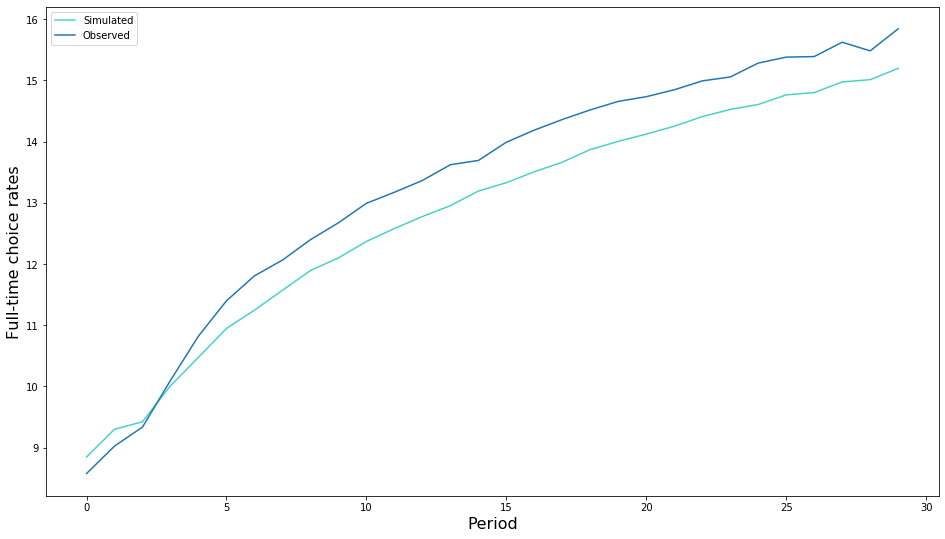

In [23]:
obs_wages = []
for _, value in obs_moments["Wage_Distribution"].items():
    temp = [_, value]
    obs_wages.append(temp[1][0])

sim_wages = []
for _, value in delta0_start_sim_moments["Wage_Distribution"].items():
    temp = [_, value]
    sim_wages.append(temp[1][0])

x = np.arange(30)

# Start plot
ax = plt.figure(figsize=[16,9]).add_subplot(111)
ax.set_ylabel(lables[choice], fontsize=16)
ax.set_xlabel("Period", fontsize=16)

plt.plot(x, sim_wages, color = 'mediumturquoise')
plt.plot(x, obs_wages)

ax.legend(["Simulated", "Observed"])

#plt.savefig('choice_prob_cf.png', bbox_inches='tight')

Analysis 1,000 Obs
-----------------------

Parameter vectors
----------------------

In [24]:
## Note fval at evaluation 999 = 4.39705

params_vec_final_seed = [
    1.92349,
    1.98973,
    1.97784,
    0.12899,
    0.1511,
    0.27304,
    0.31866,
    0.0942,
    0.12861,
    0.07585,
    0.05413,
    0.06987,
    1.89953,
    2.43803,
    -0.20104,
    -0.48932,
    -0.10004,
    -0.30027,
    0.19991,
    0.29836,
    0.01003,
    0.19165,
    0.46997,
]

In [25]:
## Note fval at evaluation 999 = 1.94921

params_vec_final_delta0 = [
    1.95248,
    2.01484,
    1.97793,
    0.12378,
    0.15805,
    0.2738,
    0.18261,
    0.08508,
    0.12817,
    0.07765,
    0.05389,
    0.06986,
    1.87663,
    2.4213,
    -0.20001,
    -0.51225,
    -0.0945,
    -0.2997,
    0.19198,
    0.30566,
    0.01003,
    0.07955,
    0.47022,
]

In [26]:
model_params_true["value"] - params_vec_final_seed

category       name     
const_wage_eq  gamma_0s1    0.03812
               gamma_0s2    0.00777
               gamma_0s3   -0.00899
exp_returns    gamma_1s1    0.00018
               gamma_1s2    0.00285
               gamma_1s3    0.00287
exp_accm       g_s1        -0.13092
               g_s2         0.00666
               g_s3         0.00492
exp_deprec     delta_s1     0.00533
               delta_s2    -0.00017
               delta_s3    -0.00024
disutil_work   const_p      0.00020
               const_f     -0.00112
hetrg_unobs    theta_p1     0.00293
               theta_f1    -0.00557
               theta_p2     0.00029
               theta_f2    -0.00877
shares         share_1     -0.00477
               share_2     -0.00305
sd_wage_shock  sigma_1     -0.00043
               sigma_2     -0.14402
               sigma_3      0.00467
Name: value, dtype: float64

Parameters that are most far off the true parameter vector here are g_s1 and theta_f1

In [27]:
model_params_true["value"] - params_vec_final_delta0

category       name     
const_wage_eq  gamma_0s1    0.00913
               gamma_0s2   -0.01734
               gamma_0s3   -0.00908
exp_returns    gamma_1s1    0.00539
               gamma_1s2   -0.00410
               gamma_1s3    0.00211
exp_accm       g_s1         0.00513
               g_s2         0.01578
               g_s3         0.00536
exp_deprec     delta_s1     0.00353
               delta_s2     0.00007
               delta_s3    -0.00023
disutil_work   const_p      0.02310
               const_f      0.01561
hetrg_unobs    theta_p1     0.00190
               theta_f1     0.01736
               theta_p2    -0.00525
               theta_f2    -0.00934
shares         share_1      0.00316
               share_2     -0.01035
sd_wage_shock  sigma_1     -0.00043
               sigma_2     -0.03192
               sigma_3      0.00442
Name: value, dtype: float64

Parameters here are overall further away from the true ones. However, this optimisation only ran for 500 evaluations. Big differences in sigma_2, constants of the wage equations and returns to experience.

Get moments
----------------

In [28]:
model_params_seed = model_params_true
model_params_seed["value"] = params_vec_final_seed

In [29]:
model_params_delta0 = model_params_true
model_params_delta0["value"] = params_vec_final_delta0

In [30]:
data_obs = pd.read_pickle("init_files/Archive/data_obs_3types.pkl")

In [31]:
data_sim_seed = soepy.simulate(model_params_seed, "init_files/Archive/model_spec_init_test_seed.yml")

In [32]:
data_sim_delta0 = soepy.simulate(model_params_delta0, "init_files/Archive/model_spec_init_test_delta0.yml")

In [33]:
def get_moments(data):
    # Pre_process data frame

    # Determine the education level given years of experience
    data["Educ_Level"] = 0
    data.loc[data["Years_of_Education"] == 11, "Educ_Level"] = 1
    data.loc[data["Years_of_Education"] == 12, "Educ_Level"] = 2

    # Determine the observed wage given period choice
    data["Wage_Observed"] = 0
    data.loc[data["Choice"] == 0, "Wage_Observed"] = data.loc[
        data["Choice"] == 0, "Period_Wage_N"
    ]
    data.loc[data["Choice"] == 1, "Wage_Observed"] = data.loc[
        data["Choice"] == 1, "Period_Wage_P"
    ]
    data.loc[data["Choice"] == 2, "Wage_Observed"] = data.loc[
        data["Choice"] == 2, "Period_Wage_F"
    ]

    # Calculate moments

    # Initialize moments dictionary
    moments = dict()

    # Store moments in groups as nested dictionary
    for group in ["Wage_Distribution", "Choice_Probability"]:
        moments[group] = dict()

    # Compute unconditional moments of the wage distribution
    info = data.groupby(["Period"])["Wage_Observed"].describe().to_dict()

    # Save mean and standard deviation of wages for each period
    # to Wage Distribution section of the moments dictionary
    for period in range(40):  ## TO DO: Remove hard coded number
        moments["Wage_Distribution"][period] = []
        try:
            for label in ["mean", "std"]:
                moments["Wage_Distribution"][period].append(info[label][period])
        except KeyError:
            for i in range(2):
                moments["Wage_Distribution"][period].append(0.0)

    # Compute unconditional moments of the choice probabilities
    info = data.groupby(["Period"])["Choice"].value_counts(normalize=True).to_dict()

    for period in range(40):  ## TO DO: Remove hard coded number
        moments["Choice_Probability"][period] = []
        for choice in range(3):
            try:
                stat = info[(period, choice)]
            except KeyError:
                stat = 0.00
            moments["Choice_Probability"][period].append(stat)

    return moments

In [34]:
obs_moments = get_moments(data_obs)
seed_sim_moments = get_moments(data_sim_seed)
delta0_sim_moments = get_moments(data_sim_delta0)

Comparison: Observed vs. seed test final values
---------------------------------------------------------

Choice Probability

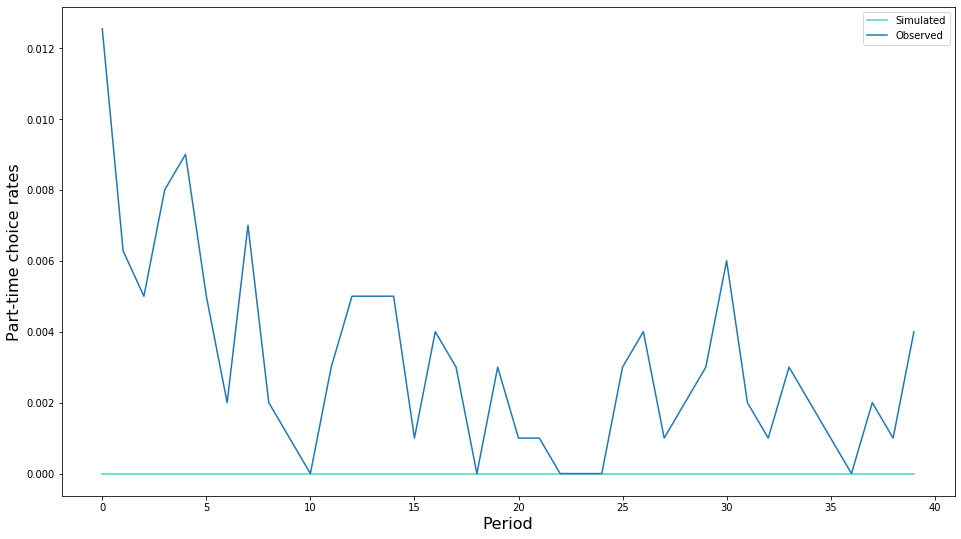

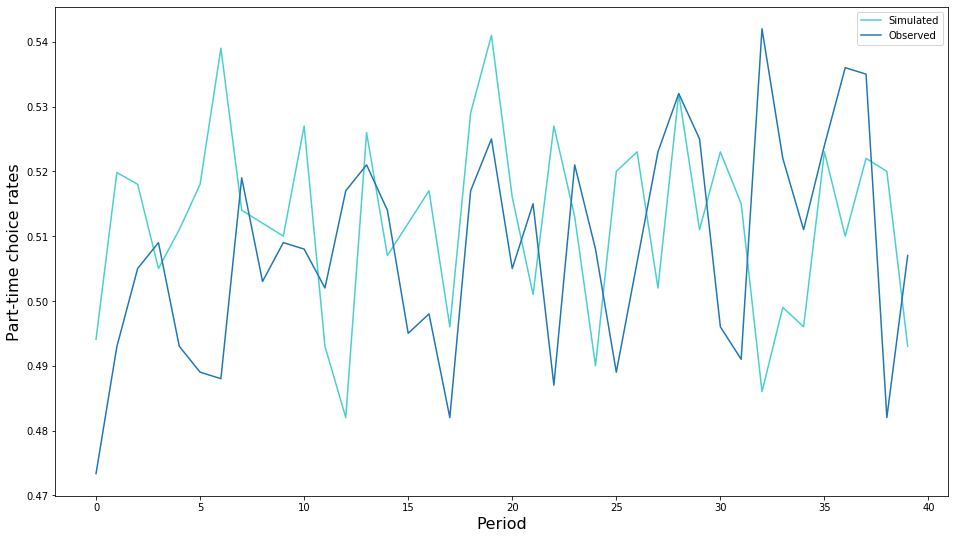

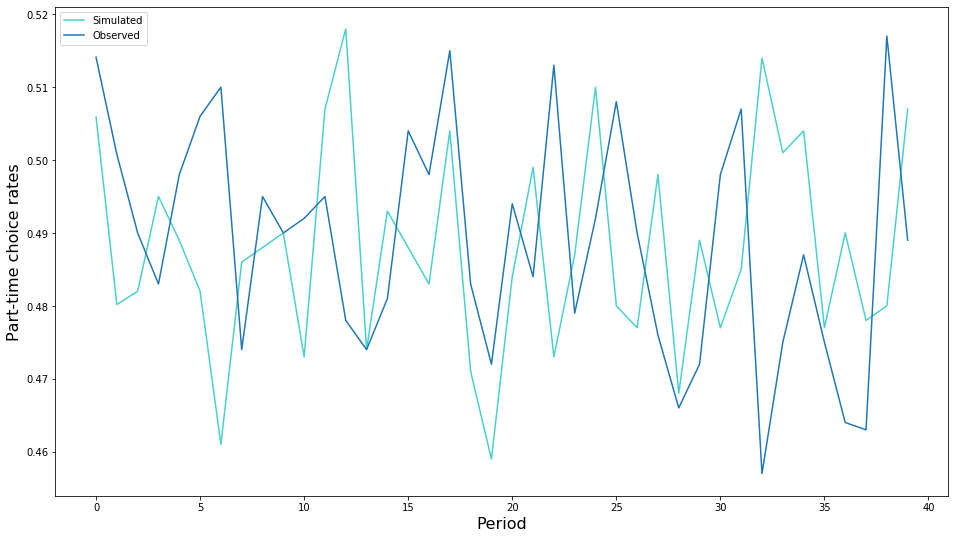

In [35]:
for choice in range(3):

    obs_choice_prob = []
    for _, value in obs_moments["Choice_Probability"].items():
        temp = [_, value]
        obs_choice_prob.append(temp[1][choice])

    sim_choice_prob = []
    for _, value in seed_sim_moments["Choice_Probability"].items():
        temp = [_, value]
        sim_choice_prob.append(temp[1][choice])
        
    x = np.arange(40)

    # Start plot
    ax = plt.figure(figsize=[16,9]).add_subplot(111)
    ax.set_ylabel("Part-time choice rates", fontsize=16)
    ax.set_xlabel("Period", fontsize=16)

    plt.plot(x, sim_choice_prob, color = 'mediumturquoise')
    plt.plot(x, obs_choice_prob)

    ax.legend(["Simulated", "Observed"])

    #plt.savefig('choice_prob_cf.png', bbox_inches='tight')

Wages

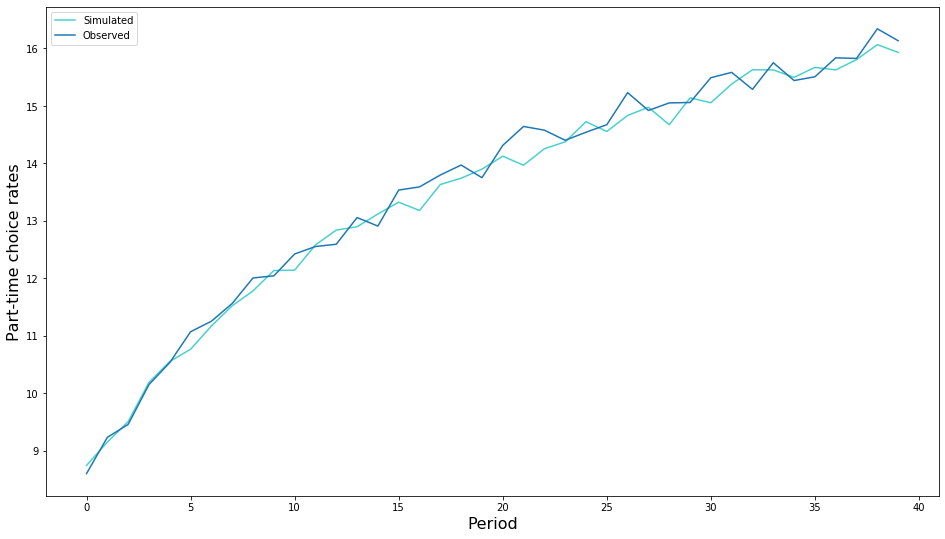

In [36]:
obs_wages = []
for _, value in obs_moments["Wage_Distribution"].items():
    temp = [_, value]
    obs_wages.append(temp[1][0])

sim_wages = []
for _, value in seed_sim_moments["Wage_Distribution"].items():
    temp = [_, value]
    sim_wages.append(temp[1][0])

x = np.arange(40)

# Start plot
ax = plt.figure(figsize=[16,9]).add_subplot(111)
ax.set_ylabel("Part-time choice rates", fontsize=16)
ax.set_xlabel("Period", fontsize=16)

plt.plot(x, sim_wages, color = 'mediumturquoise')
plt.plot(x, obs_wages)

ax.legend(["Simulated", "Observed"])

#plt.savefig('choice_prob_cf.png', bbox_inches='tight')

Comparison observed vs final delta0 values

Choice Probabilities

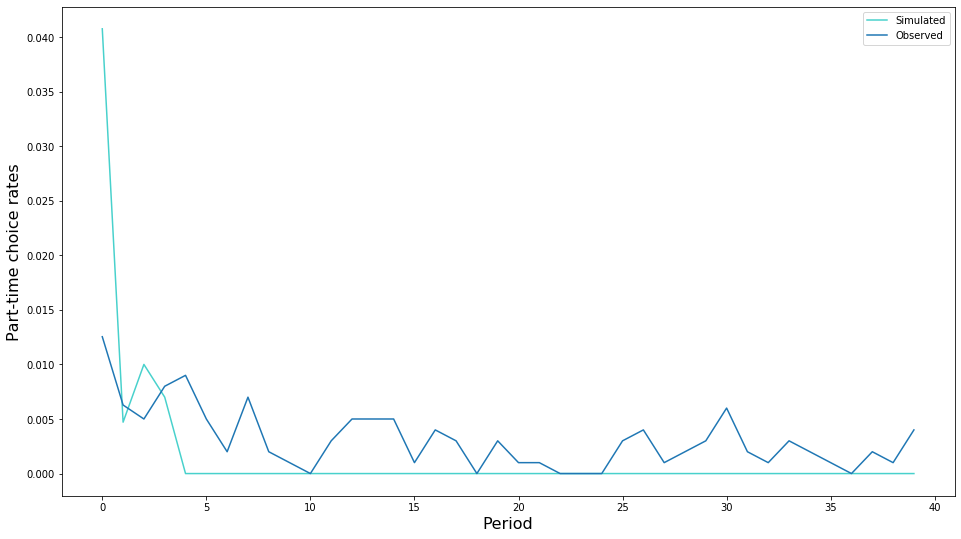

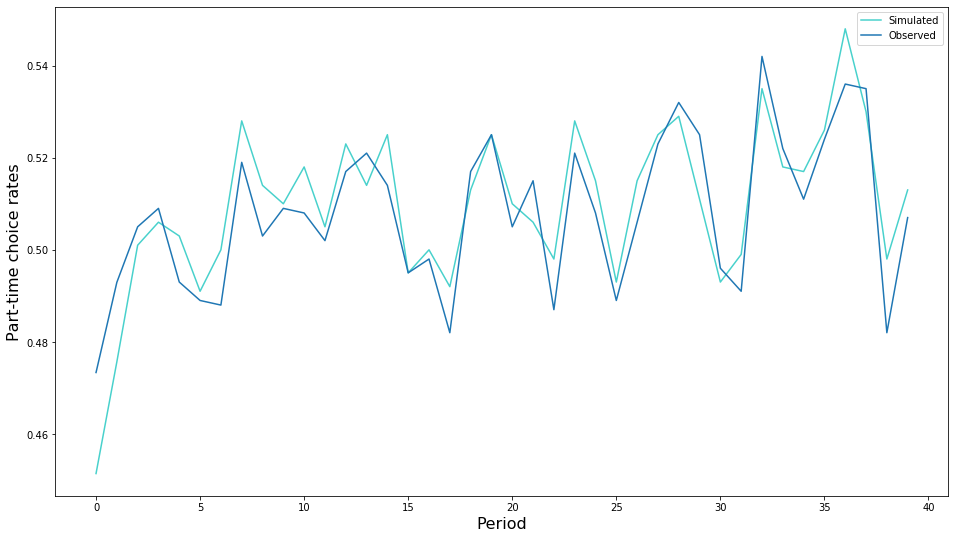

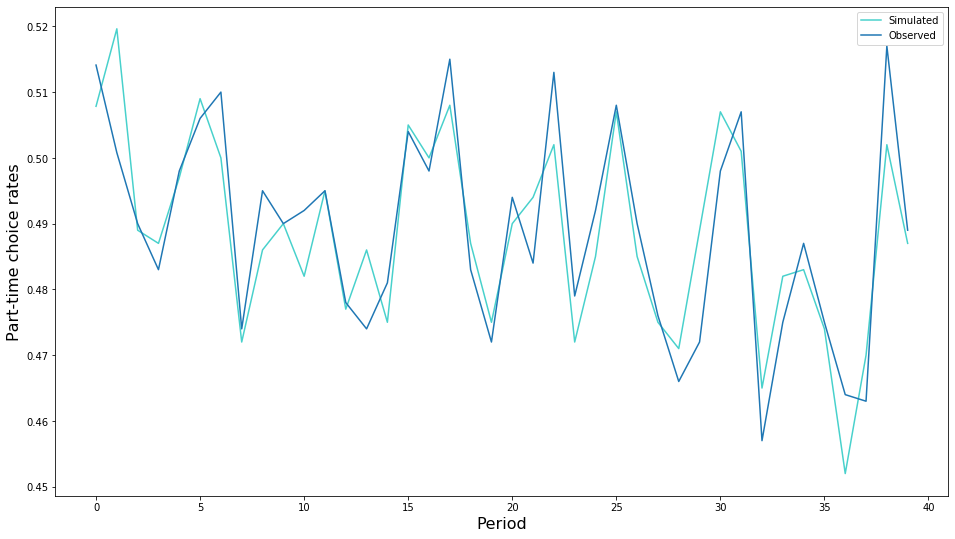

In [37]:
for choice in range(3):

    obs_choice_prob = []
    for _, value in obs_moments["Choice_Probability"].items():
        temp = [_, value]
        obs_choice_prob.append(temp[1][choice])

    sim_choice_prob = []
    for _, value in delta0_sim_moments["Choice_Probability"].items():
        temp = [_, value]
        sim_choice_prob.append(temp[1][choice])
        
    x = np.arange(40)

    # Start plot
    ax = plt.figure(figsize=[16,9]).add_subplot(111)
    ax.set_ylabel("Part-time choice rates", fontsize=16)
    ax.set_xlabel("Period", fontsize=16)

    plt.plot(x, sim_choice_prob, color = 'mediumturquoise')
    plt.plot(x, obs_choice_prob)

    ax.legend(["Simulated", "Observed"])

Wages

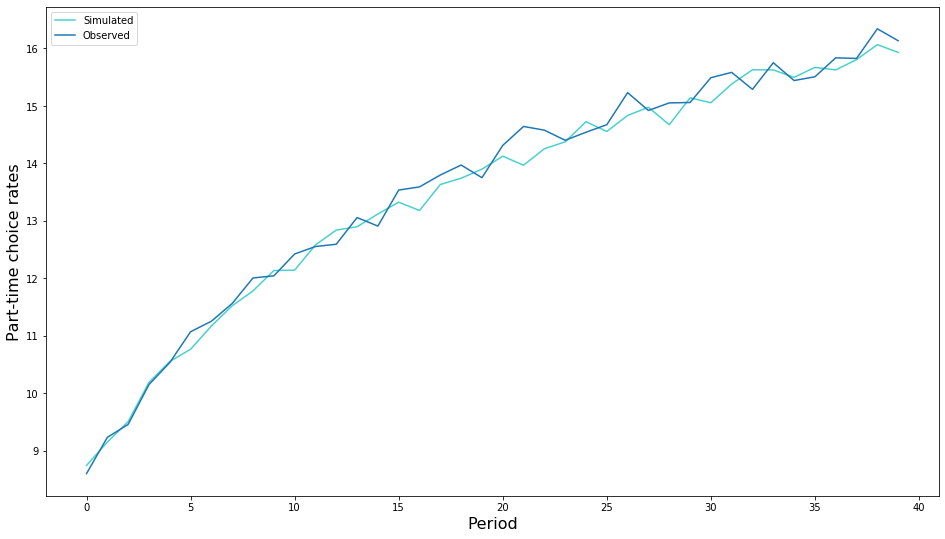

In [38]:
obs_wages = []
for _, value in obs_moments["Wage_Distribution"].items():
    temp = [_, value]
    obs_wages.append(temp[1][0])

sim_wages = []
for _, value in seed_sim_moments["Wage_Distribution"].items():
    temp = [_, value]
    sim_wages.append(temp[1][0])

x = np.arange(40)

# Start plot
ax = plt.figure(figsize=[16,9]).add_subplot(111)
ax.set_ylabel("Part-time choice rates", fontsize=16)
ax.set_xlabel("Period", fontsize=16)

plt.plot(x, sim_wages, color = 'mediumturquoise')
plt.plot(x, obs_wages)

ax.legend(["Simulated", "Observed"])

#plt.savefig('choice_prob_cf.png', bbox_inches='tight')

Comparison delta zero with true starting vector
--------------------------------------------------------

In [39]:
data_sim_delta0_1 = soepy.simulate("init_files/Archive/toy_model_init_file_03_3types.pkl", "init_files/Archive/model_spec_init_test_delta0.yml")
delta0_1_sim_moments = get_moments(data_sim_delta0_1)

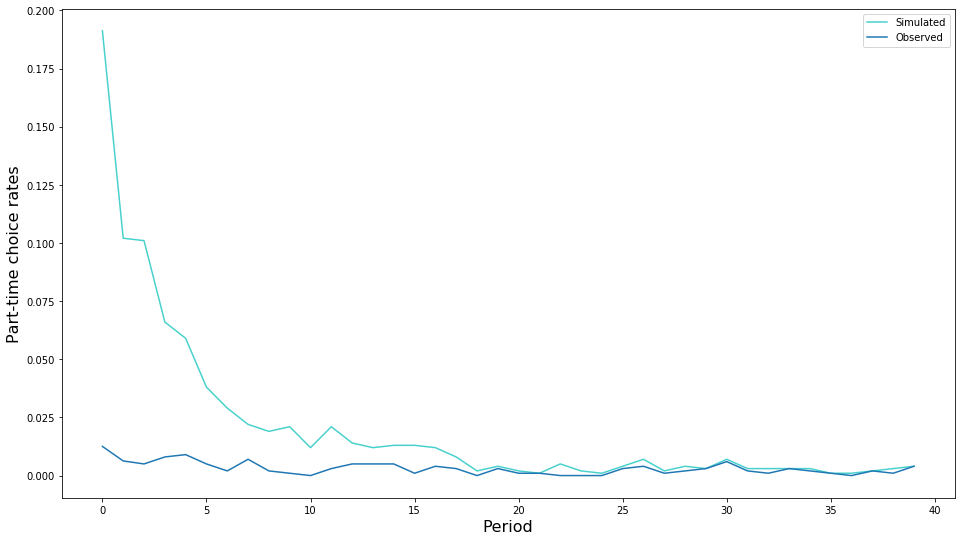

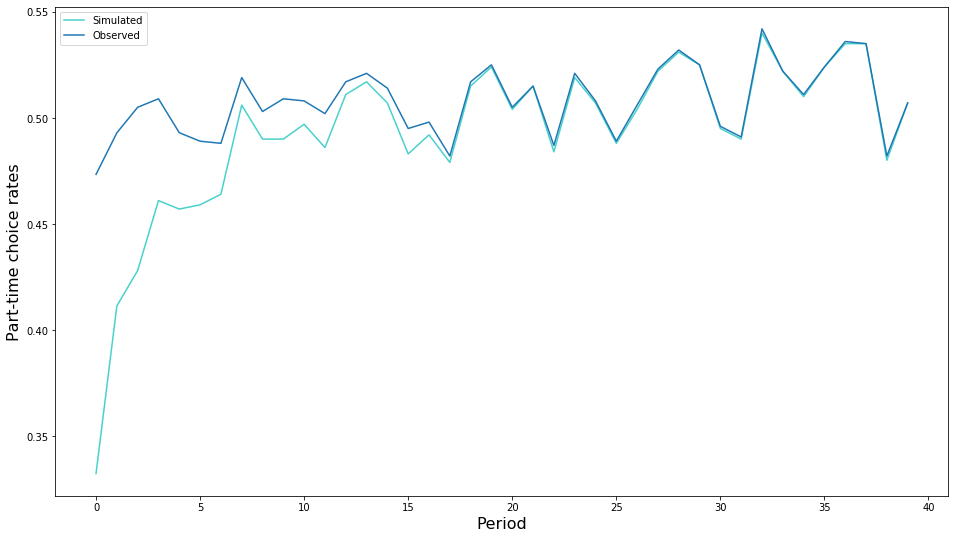

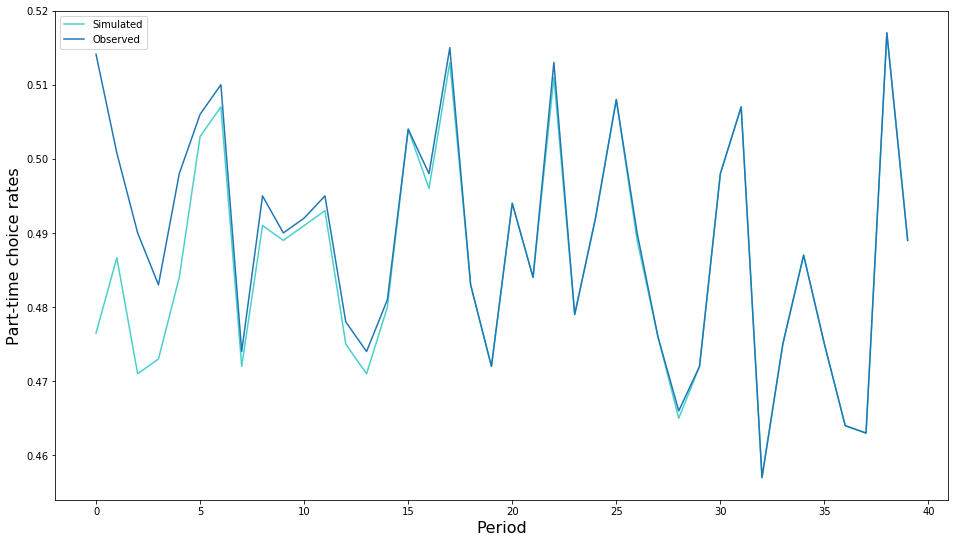

In [40]:
for choice in range(3):

    obs_choice_prob = []
    for _, value in obs_moments["Choice_Probability"].items():
        temp = [_, value]
        obs_choice_prob.append(temp[1][choice])

    sim_choice_prob = []
    for _, value in delta0_1_sim_moments["Choice_Probability"].items():
        temp = [_, value]
        sim_choice_prob.append(temp[1][choice])
        
    x = np.arange(40)

    # Start plot
    ax = plt.figure(figsize=[16,9]).add_subplot(111)
    ax.set_ylabel("Part-time choice rates", fontsize=16)
    ax.set_xlabel("Period", fontsize=16)

    plt.plot(x, sim_choice_prob, color = 'mediumturquoise')
    plt.plot(x, obs_choice_prob)

    ax.legend(["Simulated", "Observed"])

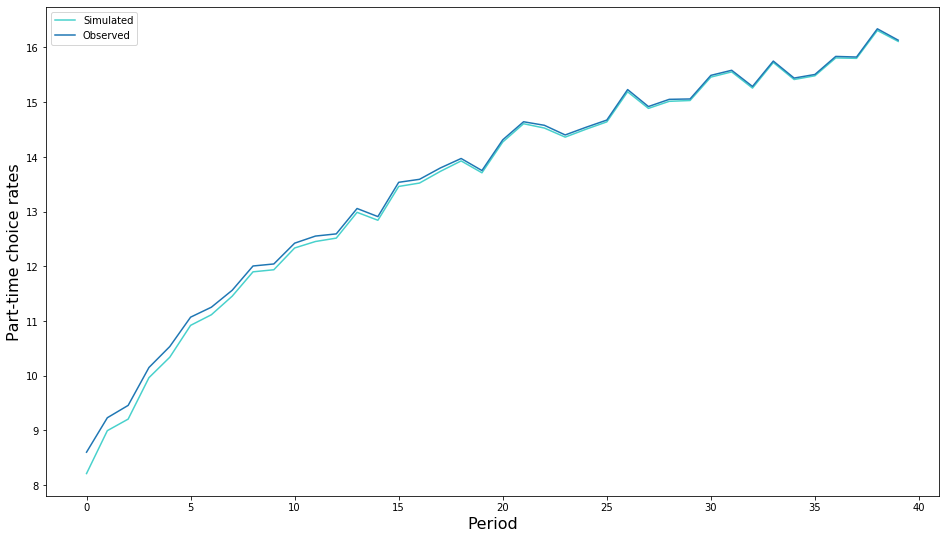

In [41]:
obs_wages = []
for _, value in obs_moments["Wage_Distribution"].items():
    temp = [_, value]
    obs_wages.append(temp[1][0])

sim_wages = []
for _, value in delta0_1_sim_moments["Wage_Distribution"].items():
    temp = [_, value]
    sim_wages.append(temp[1][0])

x = np.arange(40)

# Start plot
ax = plt.figure(figsize=[16,9]).add_subplot(111)
ax.set_ylabel("Part-time choice rates", fontsize=16)
ax.set_xlabel("Period", fontsize=16)

plt.plot(x, sim_wages, color = 'mediumturquoise')
plt.plot(x, obs_wages)

ax.legend(["Simulated", "Observed"])

#plt.savefig('choice_prob_cf.png', bbox_inches='tight')